In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras

In [11]:
#Load image data
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

Number of images: 3670


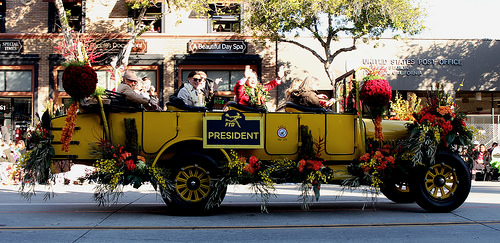

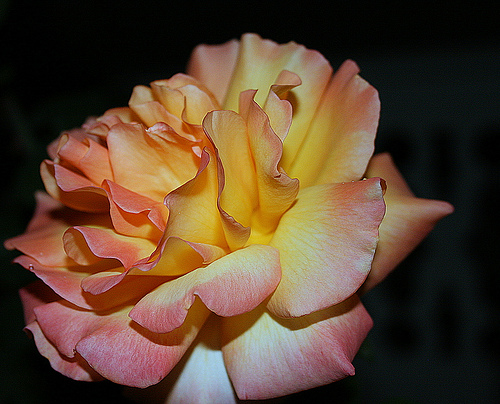

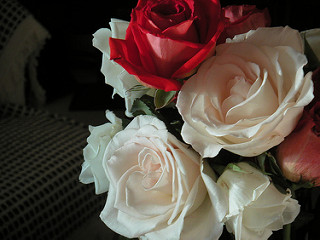

In [12]:
#About the data
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Number of images: %s" % (image_count))

#Preview some images
roses= list(data_dir.glob('roses/*'))
display(PIL.Image.open(str(roses[0])))
display(PIL.Image.open(str(roses[100])))
display(PIL.Image.open(str(roses[200])))

In [13]:
#Create datasets - Training
batch_size= 32
height= 180
width= 180

training_data= tf.keras.preprocessing.image_dataset_from_directory(directory= data_dir,
                                                                  validation_split= .2,
                                                                  subset= "training",
                                                                  image_size=(height, width),
                                                                  batch_size= batch_size,
                                                                  seed= 24)

#Create datasets - Validation
validation_data= tf.keras.preprocessing.image_dataset_from_directory(directory= data_dir,
                                                                    validation_split= .2,
                                                                    subset= "validation",
                                                                    image_size=(height, width),
                                                                    batch_size= batch_size,
                                                                    seed= 24)

class_names= training_data.class_names
print("\nClass Labels: %s" % (class_names))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.

Class Labels: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


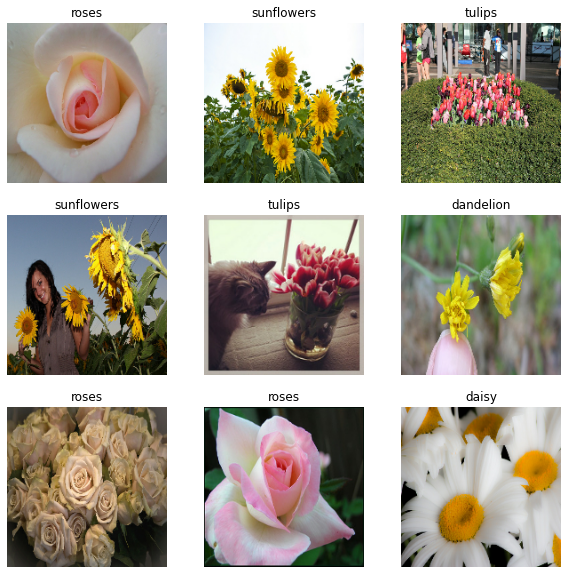

In [14]:
#View first 9 training images
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(training_data.class_names[labels[i]])
        plt.axis("off")

In [15]:
#Configure data pipeline
AUTOTUNE= tf.data.AUTOTUNE

X_train= training_data.cache().prefetch(buffer_size= AUTOTUNE)
X_test= validation_data.cache().prefetch(buffer_size= AUTOTUNE)

In [21]:
#Build Model
num_classes= 5

model= tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale= 1./255, input_shape= (height, width, 3)),
    tf.keras.layers.Conv2D(16,3, padding= "same", activation= "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, padding= "same", activation= "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, padding= "same", activation= "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= "relu"),
    tf.keras.layers.Dense(len(class_names))
])

#Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#View model summary
model.summary()

In [22]:
#Train model
epochs= 10

history= model.fit(X_train, validation_data= X_test, epochs= epochs)

Epoch 1/15
92/92 [==============================] - 12s 125ms/step - loss: 1.4736 - accuracy: 0.3630 - val_loss: 1.1356 - val_accuracy: 0.5531
Epoch 2/15
92/92 [==============================] - 10s 113ms/step - loss: 1.0242 - accuracy: 0.5924 - val_loss: 1.0350 - val_accuracy: 0.5858
Epoch 3/15
92/92 [==============================] - 10s 113ms/step - loss: 0.8374 - accuracy: 0.6954 - val_loss: 1.0405 - val_accuracy: 0.5913
Epoch 4/15
92/92 [==============================] - 10s 114ms/step - loss: 0.6284 - accuracy: 0.7779 - val_loss: 1.3737 - val_accuracy: 0.5490
Epoch 5/15
92/92 [==============================] - 10s 114ms/step - loss: 0.4552 - accuracy: 0.8319 - val_loss: 1.2333 - val_accuracy: 0.6076
Epoch 6/15
92/92 [==============================] - 10s 113ms/step - loss: 0.4075 - accuracy: 0.8612 - val_loss: 1.4021 - val_accuracy: 0.6117
Epoch 7/15
92/92 [==============================] - 10s 114ms/step - loss: 0.2704 - accuracy: 0.9042 - val_loss: 1.4405 - val_accuracy: 0.5817

In [29]:
#Evaluate model performance - Train/Validation Accuracy v Epochs
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(0, 15)
epochs

range(0, 15)